## Lab 1
### Student Name

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv')

## Q1

What are the variables in this dataset? Which are categorical? Which are continuous? Discrete? (Use pandas commands to answer these questions!)

In [9]:
# variables
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [11]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [13]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

From peeking at the table and looking at the ```dtypes```, it looks like ```species```, ```island```, and ```sex``` are categorical while ```bill_length_mm```, ```bill_depth_mm```, ```flipper_length_mm```, and ```body_mass_g``` are continuous numeric variables.

There are no discrete variables. However we could make the choice to treat ```sex``` as a *Boolean* variable if we interpret it as ```is_female```.

## Q2

Which columns have missing values? How many?

In [16]:
# which?
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

## Q3
Which species type, on average, weighs more? Does there seem to be a difference between
male and female weight?

In [17]:
df.groupby('species')['body_mass_g'].mean()

species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64

Looks like ```Gentoo``` is the heaviest!

In [18]:
df.groupby('sex')['body_mass_g'].mean()

sex
FEMALE    3862.272727
MALE      4545.684524
Name: body_mass_g, dtype: float64

Appears as if ```MALE``` penguins weigh more.

## Q4
How many species types are there? How many penguins are there for each species type?

In [21]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [23]:
print(f'Looks like there are {len(df["species"].unique())} species types.')

Looks like there are 3 species types.


In [27]:
# here's the count for each species
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

## Q5

Create a dataframe of only penguins of species ```Adelie```.

In [28]:
df[df['species'] == 'Adelie']

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,FEMALE
148,Adelie,Dream,36.0,17.8,195.0,3450.0,FEMALE
149,Adelie,Dream,37.8,18.1,193.0,3750.0,MALE
150,Adelie,Dream,36.0,17.1,187.0,3700.0,FEMALE


## Q6

Create a scatter plot where the x values are the first 100 integers in ascending order and the y values are the first 100 integers in descending order.

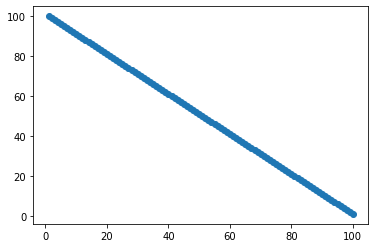

In [40]:
x = np.arange(1, 101)

# a little Python trick for reversing the order of a list/array
y = x[::-1]

plt.scatter(x, y)
plt.show()

## Q7
Create *one* figure with four histograms, one for each of the numeric variables in the penguins data.

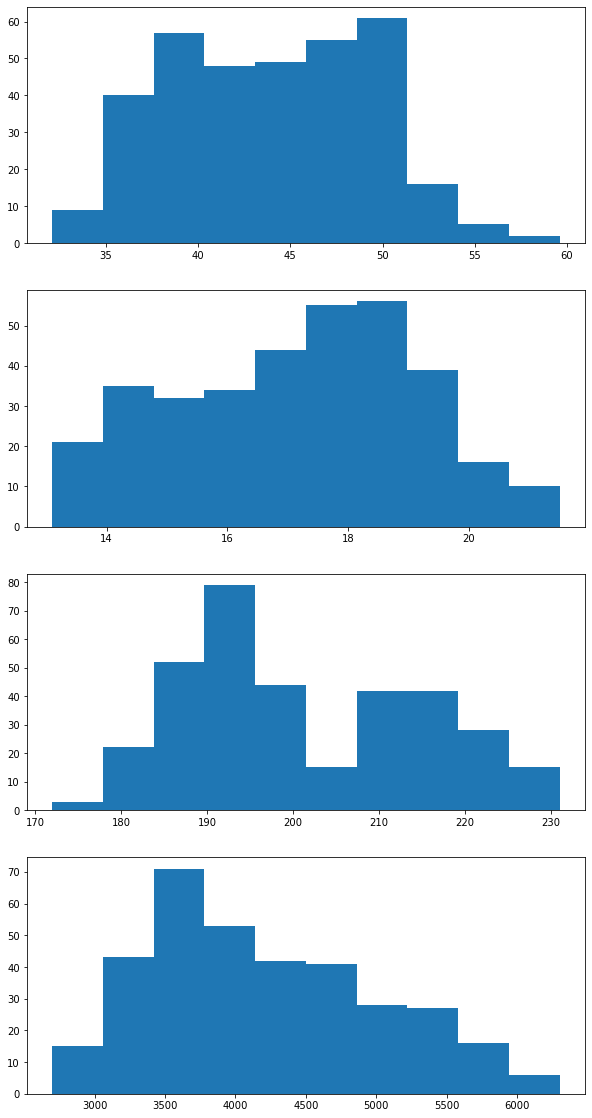

In [47]:
figure, axes = plt.subplots(nrows=4, ncols=1, figsize=(10,20))

axes[0].hist(df['bill_length_mm'])
axes[1].hist(df['bill_depth_mm'])
axes[2].hist(df['flipper_length_mm'])
axes[3].hist(df['body_mass_g'])
plt.show()

## Q8
Make a scatter plot comparing two of numeric variables in the penguins data. Is there any relationship here?

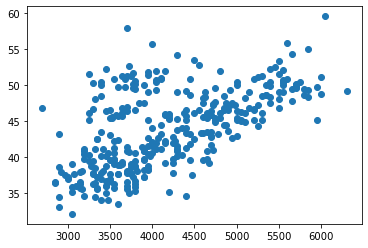

In [48]:
plt.scatter(df['body_mass_g'], df['bill_length_mm'])
plt.show()

Looks like the relationship is somewhat linear, except for a cluster of outliers with high bill length and low body mass. Might be a different species!

## BONUS

In [49]:
# new column!
# there is about 0.00220462 pounds in a gram

df['body_mass_lb'] = 0.00220462 * df['body_mass_g']
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,body_mass_lb
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,8.267325
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,8.377556
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,7.165015
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,7.605939


In [54]:
# here are the species counts
species_counts = df['species'].value_counts()
species_counts

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

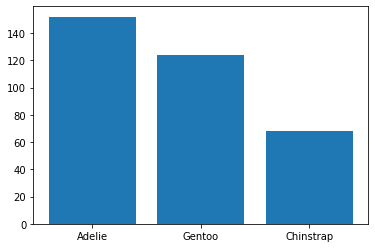

In [57]:
# we'll get the species names from .keys() method
plt.bar(x=species_counts.keys(), height=species_counts)
plt.show()

Coloring points using plt.scatter is rather complicated. I'll go with seaborn. A good discussion of doing this can be found [here](https://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib), which is I figured out how to do it! So consider this my citation!

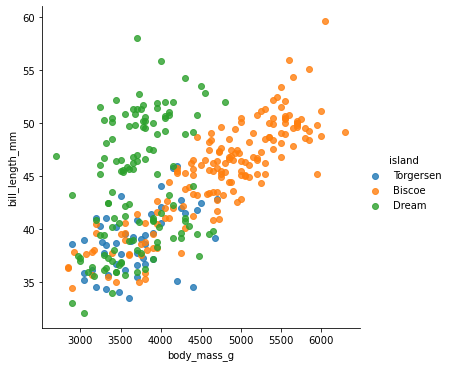

In [64]:
import seaborn as sns
sns.lmplot(x='body_mass_g', y='bill_length_mm', data=df, hue='island', fit_reg=False)